# Explore, Visualize, and Analyze Data

In [110]:
%config IPCompleter.greedy=True
import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

## Reading the datasets

In [155]:
train_data = pd.read_csv('dataset/train.csv', sep=',',low_memory=False,index_col = 'Date')
store_data = pd.read_csv('dataset/store.csv', sep=',',low_memory=False)



### Description 
Making a first summary for eache table that gathers basic information such as the minima the maxima,the mean and the number of elements

In [7]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# Visualize Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023882933B38>]],
      dtype=object)

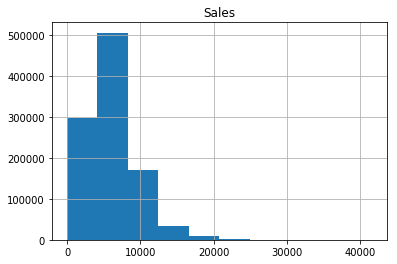

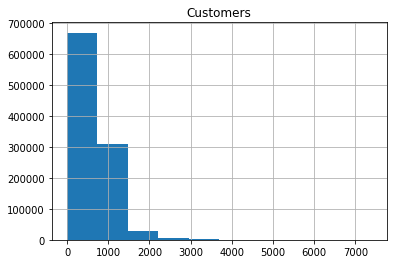

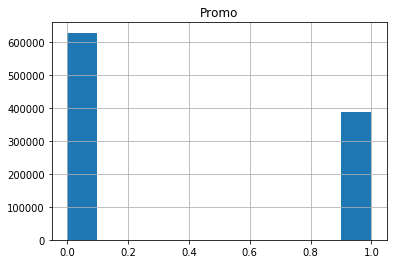

In [18]:

#Histrogramme for some entries of train data
train_data.hist(column='Sales')
train_data.hist(column='Customers')
train_data.hist(column='Promo')



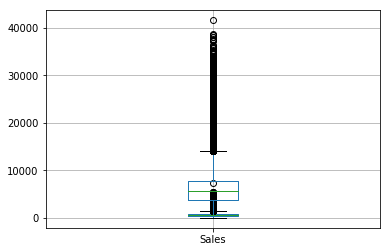

In [16]:
#Boxplot
train_data.boxplot(column='Customers')


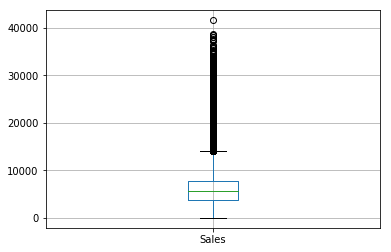

In [17]:
#Boxplot
train_data.boxplot(column='Sales')

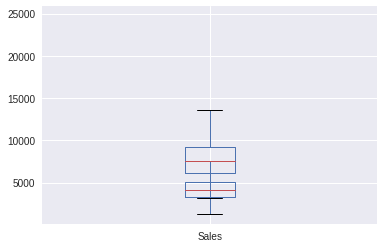

In [20]:
no_promo = train_data[train_data['Promo']==0]
promo = train_data[train_data['Promo']==1]
train_no_promo = no_promo.groupby('Store',as_index=True).mean()
train_promo = promo.groupby('Store').mean()
train_no_promo.boxplot(column='Sales')
train_promo.boxplot(column='Sales')


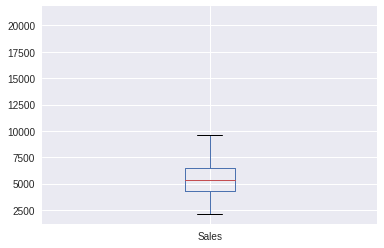

In [21]:
no_holiday = train_data[train_data['SchoolHoliday']==0]
holiday = train_data[train_data['SchoolHoliday']==1]
train_no_holiday = no_holiday.groupby('Store',as_index=True).mean()
train_holiday = holiday.groupby('Store').mean()
train_no_holiday.boxplot(column='Sales')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002388260A6A0>]],
      dtype=object)

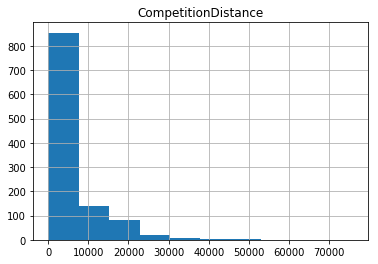

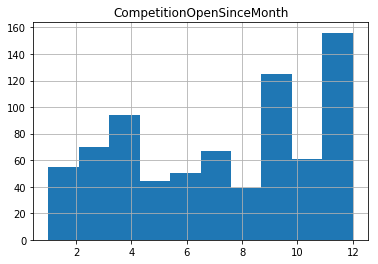

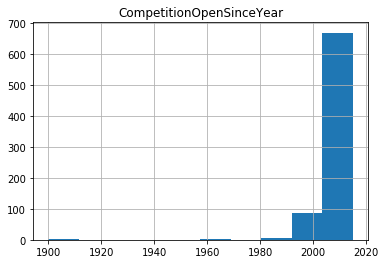

In [19]:
#Histrogramme for some entries of train data
store_data.hist(column='CompetitionDistance')
store_data.hist(column='CompetitionOpenSinceMonth')
store_data.hist(column='CompetitionOpenSinceYear')

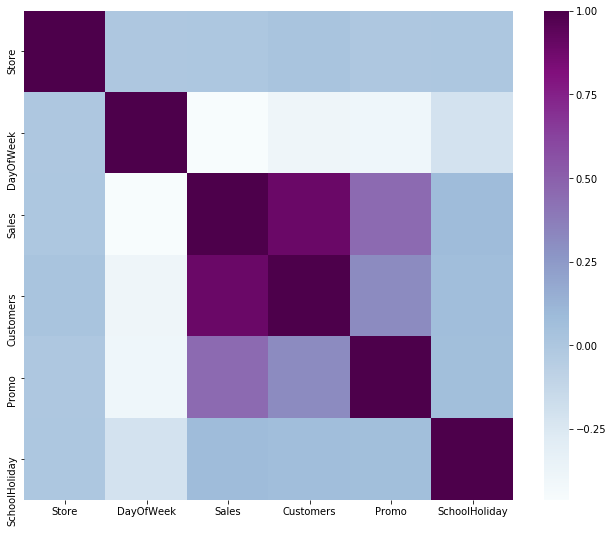

In [11]:
heatmapcorr=train_data.drop('Open',axis=1).corr()
f,ax=plt.subplots(figsize=(11,9))

sns.heatmap(heatmapcorr,square=True,ax=ax,cmap = "BuPu")



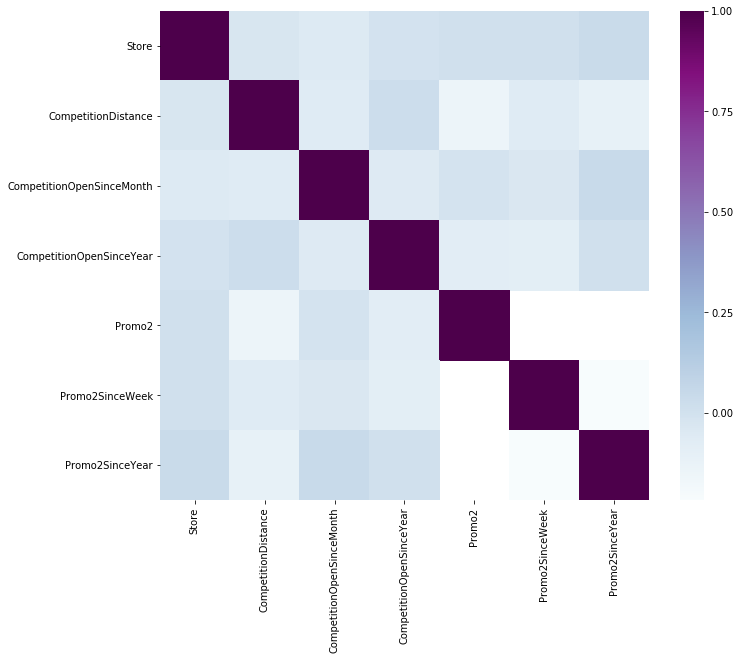

In [10]:
heatmapcorr=store_data.corr()
f,ax=plt.subplots(figsize=(11,9))

sns.heatmap(heatmapcorr,square=True,ax=ax,cmap = "BuPu")


In [15]:
#Selection
store10k=train_data[train_data["Sales"]>10000][["Customers","Promo","SchoolHoliday"]]
store10k.describe()

,Customers,Promo,SchoolHoliday
count,113633.000000,113633.000000,113633.000000
mean,1392.229704,0.738175,0.221951
std,599.032002,0.439630,0.415560
min,216.000000,0.000000,0.000000
25%,999.000000,0.000000,0.000000
50%,1231.000000,1.000000,0.000000
75%,1573.000000,1.000000,0.000000
max,7388.000000,1.000000,1.000000


In [35]:
#Contingency table
#table=pd.crosstab(store_data["StoreType"],train_data["Sales"])
#table.plot(kind="bar", 
 #                figsize=(8,8),
  #               stacked=True)


Now we are going to try to visualize the influence of some variables in order to emphisize on them while convicing the client


## Missing data
In order to avoid bias of bias we are then getting rid of some useless data.

Getting redding of the information related to a closed store

In [33]:
train=train_data[(train_data["Sales"]!=0) & (train_data["Open"]!=0)]


In [73]:
store=store_data.isnull().sum()

#### Competitions

In [64]:
store_data['CompetitionDistance'].dropna()


In [55]:
store_data['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].median(),inplace=True)

In [56]:
store_data['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].median(),inplace=True)

##### Promo2


In [68]:
_ = store_data[pd.isnull(store_data.Promo2SinceWeek)]
_[_.Promo2 != 0].shape

(0, 10)

In [74]:
store_data.fillna(-1, inplace = True)


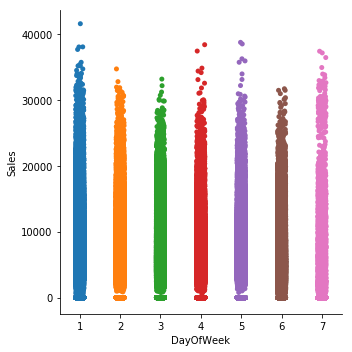

In [83]:
sns.catplot(data=train_data,x="DayOfWeek",y="Sales")

### Merging
In order to evaluate the relevance of some othe parameters such as the StoreType 

In [75]:
train_store = pd.merge(train, store_data, how = 'inner', on = 'Store')

### Correlation

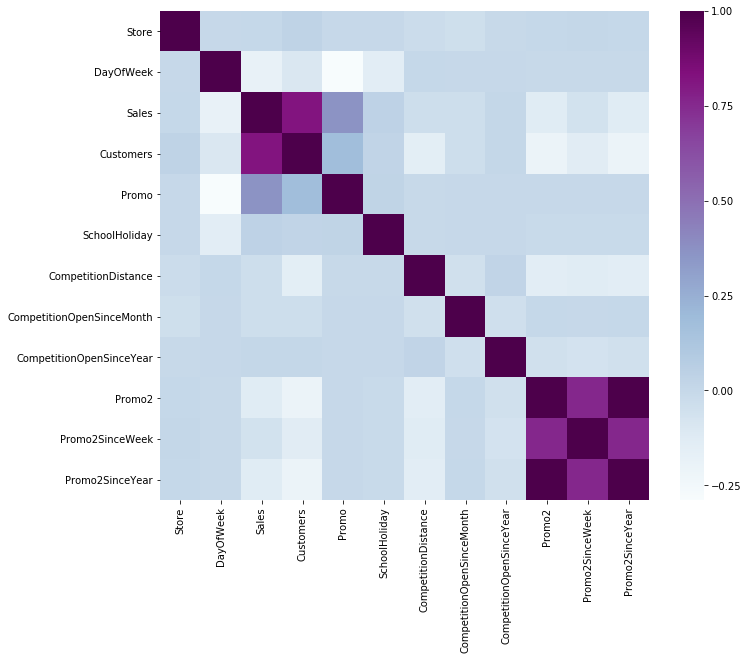

In [86]:
heatmapcorr=train_store.drop('Open',axis=1).corr()
f,ax=plt.subplots(figsize=(11,9))

sns.heatmap(heatmapcorr,square=True,ax=ax,cmap = "BuPu")

Here we are exploring the sales trends by fixing differant variables in order to determine their influances 


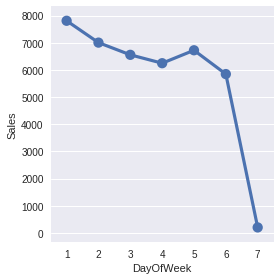

In [18]:
sns.factorplot(data=train_data,x="DayOfWeek",y="Sales")

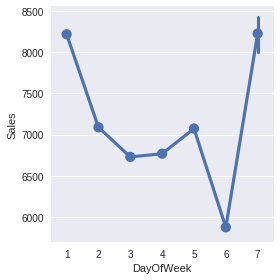

In [37]:
# Sales per day trends
sns.factorplot(data=train_store,x="DayOfWeek",y="Sales")

c:\users\mamoun\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


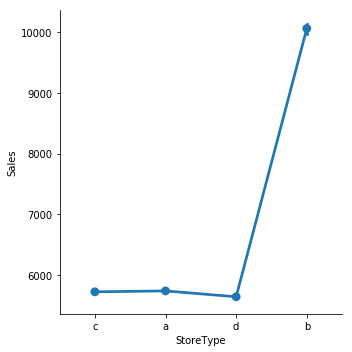

In [150]:
# Sales per type
sns.factorplot(data=train_store,x="StoreType",y="Sales")

c:\users\mamoun\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


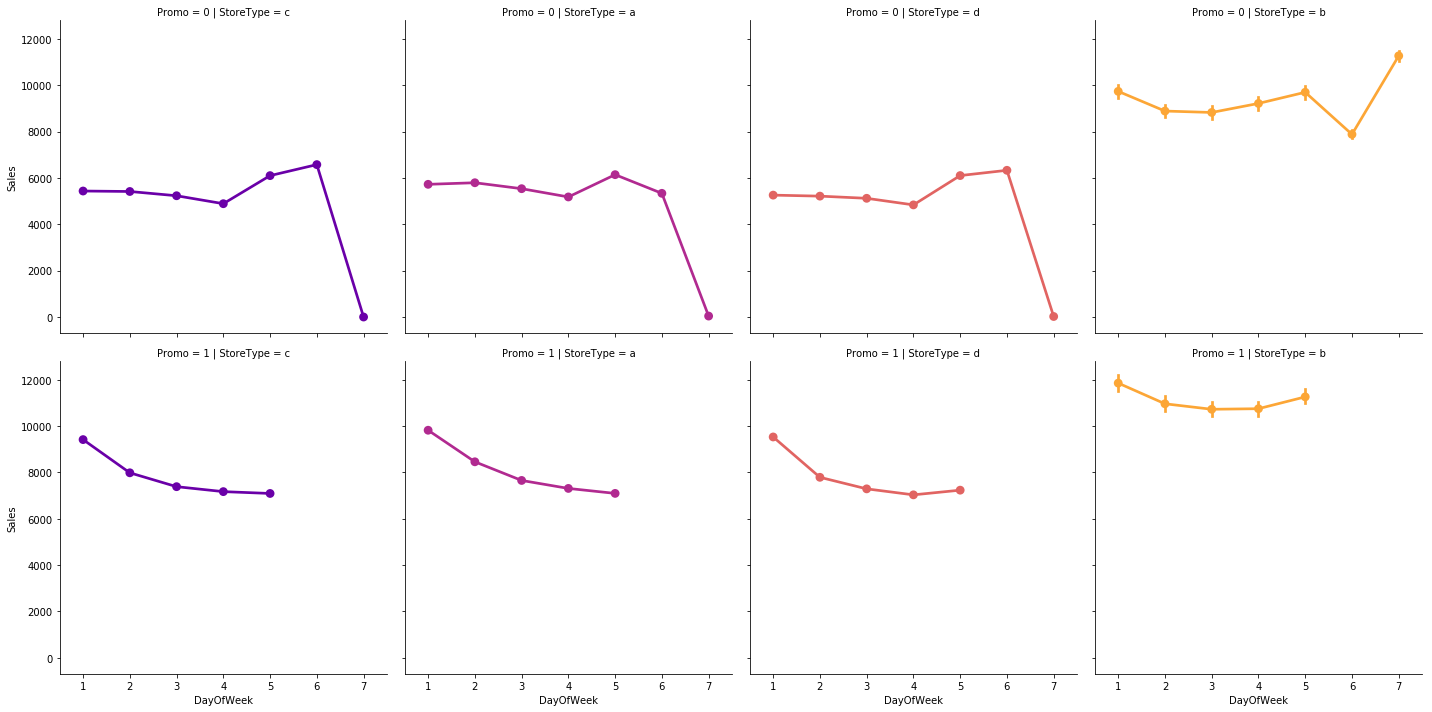

In [156]:
sns.factorplot(data = train_store, x = 'DayOfWeek', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo' # per promo in the store in rows
    )

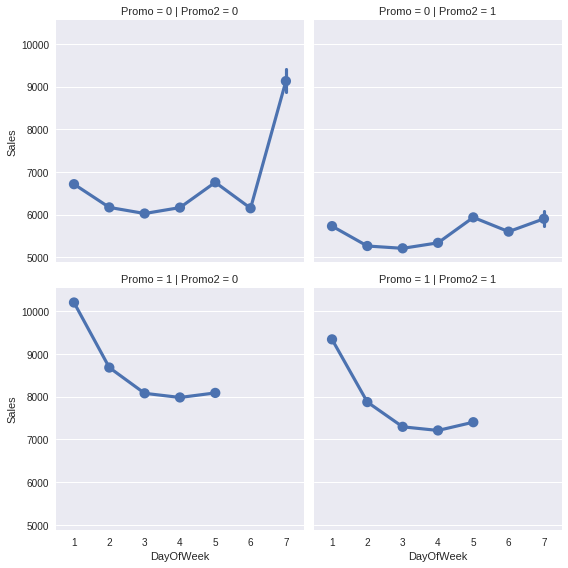

In [45]:
sns.factorplot(data=train_store,x="DayOfWeek",y="Sales",row="Promo",col="Promo2")

### Lets get wider 
Now the idea is to visualiaze the influences of variables on sales but in every month


In [139]:
train_data = pd.read_csv('dataset/train.csv', sep=',',parse_dates = True,low_memory=False,index_col = 'Date')


c:\users\mamoun\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


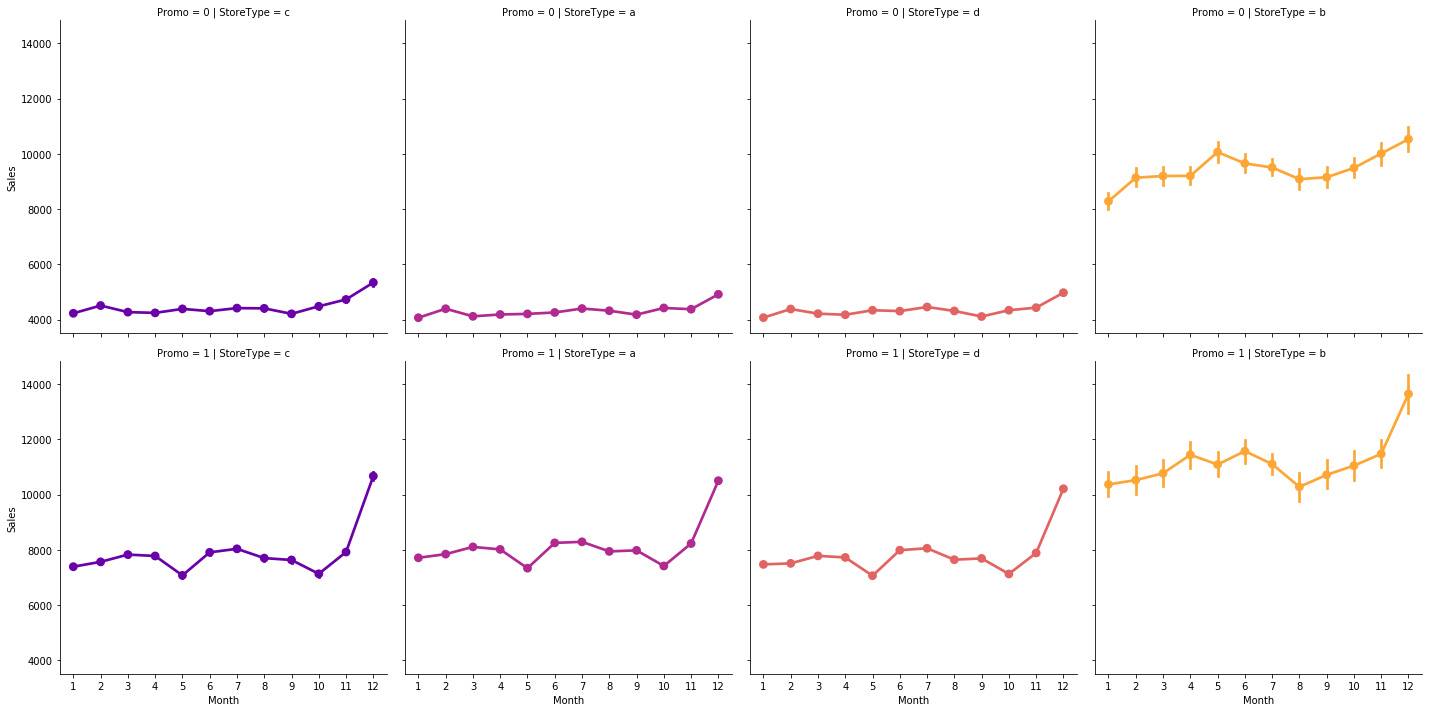

In [120]:
train_data['Month'] = train_data.index.month
train_store = pd.merge(train_data, store_data, how = 'inner', on = 'Store')
#sns.factorplot(data=train_store,x="Month",y="Sales",row="StoreType")
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo' # per promo in the store in rows
    )

## The customer
The sales per customer can gives hints on the days with the highest affluence, the influence of the promotions or the type of product.


c:\users\mamoun\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


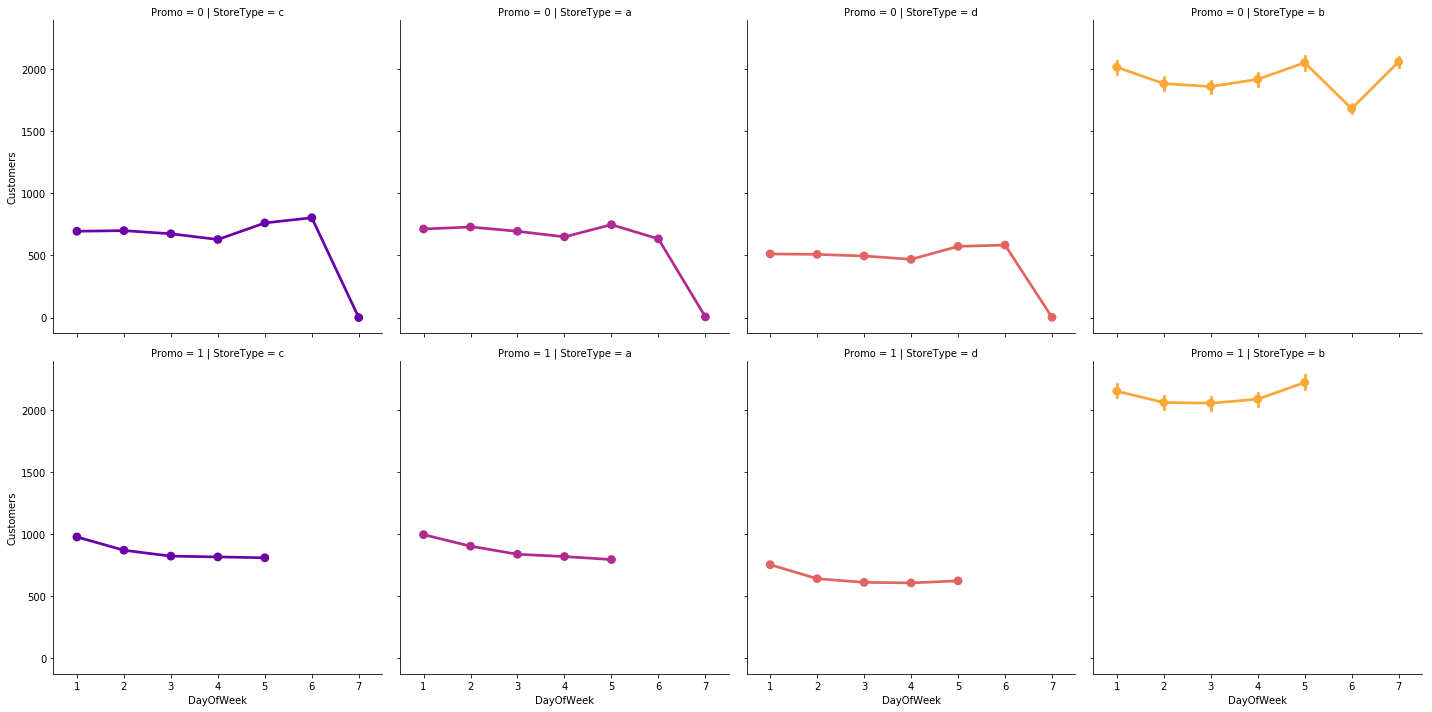

In [164]:
sns.factorplot(data = train_store, x = 'DayOfWeek', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo') # per promo in the store in rows

c:\users\mamoun\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


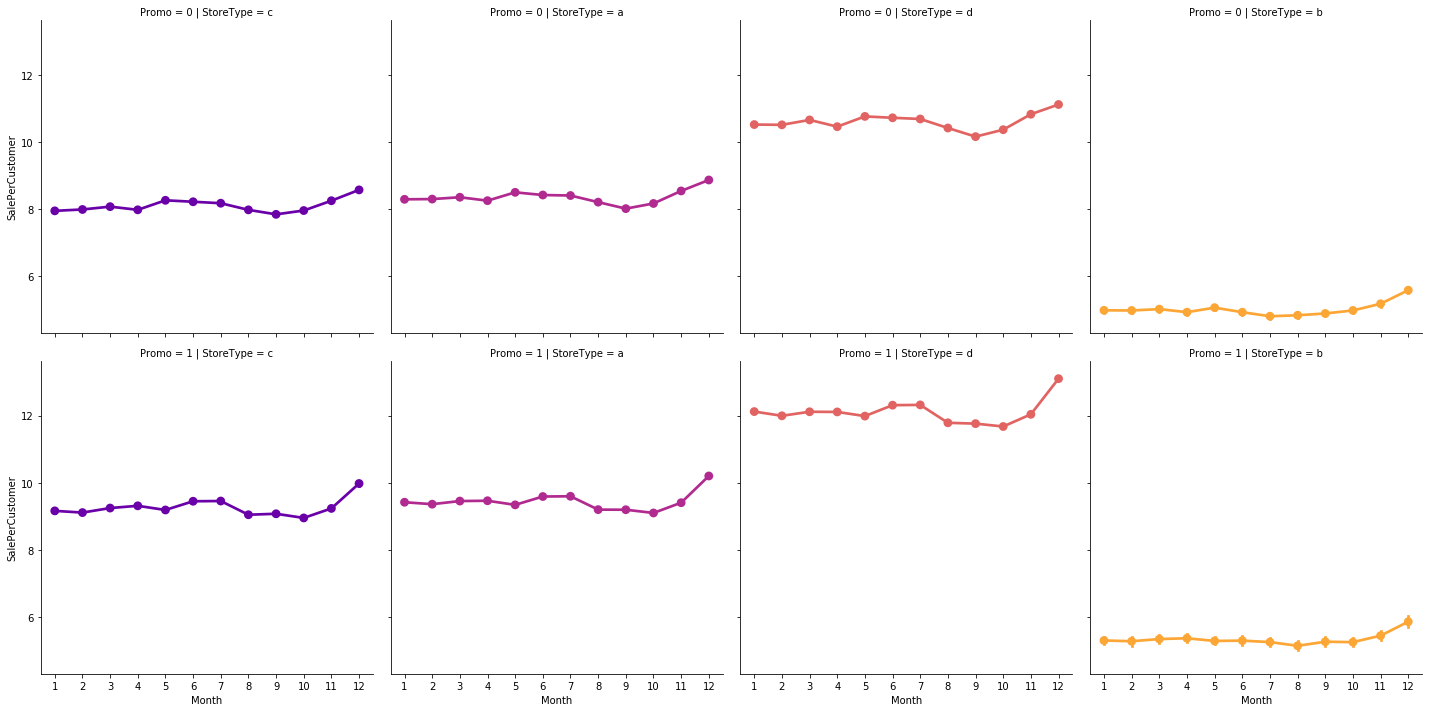

In [158]:
# adding new variable
train_store['SalePerCustomer'] = train_store['Sales']/train_store['Customers']


sns.factorplot(data = train_store, x = 'Month', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo') # per promo in the store in rows
             

c:\users\mamoun\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


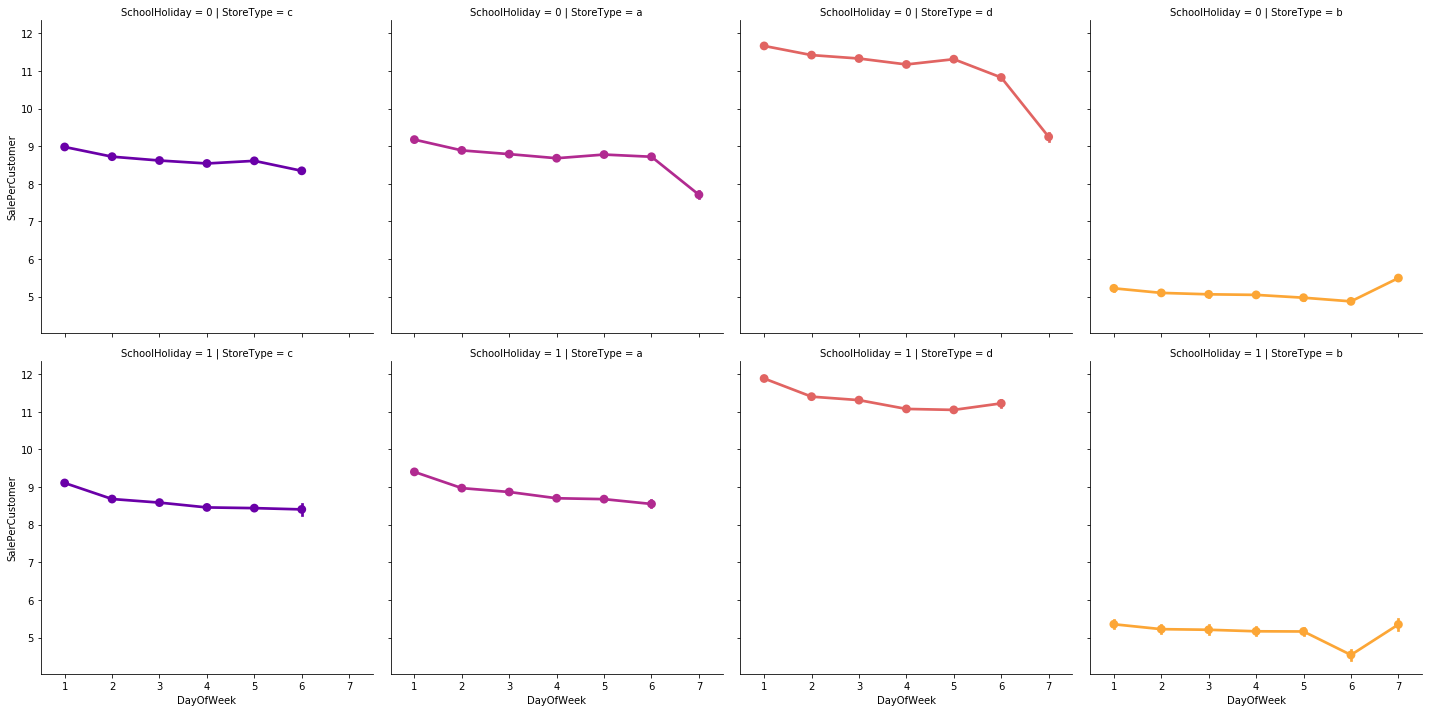

In [162]:
sns.factorplot(data = train_store, x = 'DayOfWeek', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'SchoolHoliday') # per promo in the store in rows
             